In [1]:
from skimage import io, color
import sklearn.neural_network
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# 3 different classes
fruits = ['apple', 'lemon', 'mango']

/home/viki/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


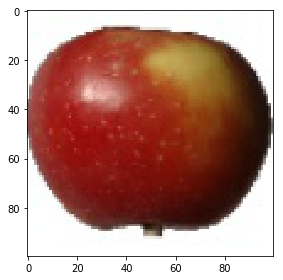

In [3]:
# image of apple
io.imshow(io.imread("/home/viki/ml/computer_vision/fruits/apple/182_100.jpg"))
plt.show()

/home/viki/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


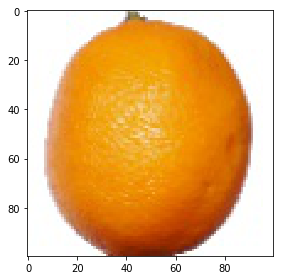

In [4]:
# image of mango
io.imshow(io.imread("/home/viki/ml/computer_vision/fruits/lemon/182_100.jpg"))
plt.show()

/home/viki/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


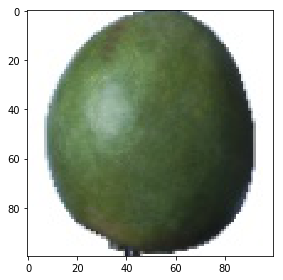

In [5]:
# image of mango
io.imshow(io.imread("/home/viki/ml/computer_vision/fruits/mango/196_100.jpg"))
plt.show()

### Read total samples in all classes

In [6]:
total_imgs = 0
for fruit in fruits:
    
    img_dir = os.path.sep + 'fruits' + os.path.sep + fruit
    full_path = os.getcwd() + img_dir
    imgs = len(os.listdir(full_path))
    total_imgs += imgs
    print(fruit + ' contains ' + str(imgs) + ' samples')
print("Total samples: ", total_imgs)
fruit_features = np.zeros((total_imgs, 360))  # fruit_features = (total_samples ,Hue (range from 0 to 360))
outputs = np.zeros(total_imgs)                

apple contains 492 samples
lemon contains 490 samples
mango contains 490 samples
Total samples:  1472


### Extracting hue features from images

In [7]:
fruit_class = 0
idx = 0
for fruit in fruits:
    img_dir = os.path.sep + 'fruits' + os.path.sep + fruit
    full_path = os.getcwd() + img_dir + os.path.sep
    all_imgs = os.listdir(full_path)
    for img in all_imgs:
        fruit_image = io.imread(full_path + img)
        read_img_hsv = color.rgb2hsv(fruit_image)
        
        # Read hue values from all training samples
        hist = np.histogram(a=read_img_hsv[:, :, 0], bins=360)
        fruit_features[idx, :] = hist[0]
        outputs[idx] = fruit_class
        idx += 1
    fruit_class += 1

### Check the standarad deviation between different classes:

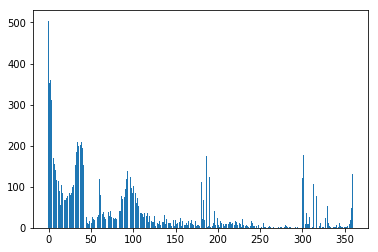

In [8]:
features_std = np.std(fruit_features, axis=0)
plt.bar(x=np.arange(360), height=features_std)
plt.show()

### Remove features which are less than standarad deviation of 50

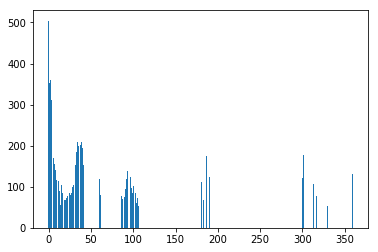

In [9]:
threshold = 50
features_std2 = np.multiply(features_std, features_std > threshold)
plt.bar(x=np.arange(360), height=features_std2)
plt.show()

### Remove features, which have less than 50 standarad deviation from feature vector

In [10]:
fruit_features2 = fruit_features[:, features_std > 50]

### Feed into the neural network and predict the accuracy for the training samples

In [11]:
# fruit_features2 which has less than 50 SD

model = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(200, 200, 200, 160), activation='relu', 
                                             solver='sgd', learning_rate='adaptive', max_iter=1000)
model.fit(X=fruit_features2, y=outputs)
predicted = model.predict(fruit_features2)
print('Accuracy: ' + str(np.mean(np.equal(predicted,outputs)) * 100))

Accuracy: 33.28804347826087
